# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Extracting mnist: 100%|███████████████████████████████████████████████████| 60.0K/60.0K [02:34<00:00, 388File/s]


Extracting celeba...


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

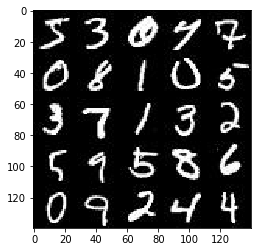

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

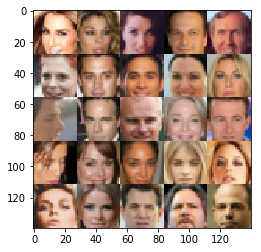

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

C:\Softwares\Anaconda3\envs\dlnd-tf-lab\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


TensorFlow Version: 1.8.0


C:\Softwares\Anaconda3\envs\dlnd-tf-lab\lib\site-packages\ipykernel\__main__.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='input_real')
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')

    return inputs_real, inputs_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [94]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    alpha = 0 # RELU
    with tf.variable_scope('discriminator', reuse=reuse):
        # Input layer is 28x28x3
        x1 = tf.layers.conv2d(images, 32, 5, strides = 2, padding='same')
        relu1 = tf.maximum(alpha*x1, x1)
        #14x14x32
        
        x2 = tf.layers.conv2d(relu1, 64, 5, strides = 2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha*bn2, bn2)
        #7x7x64
                
        flat = tf.reshape(relu2, (-1, 7*7*64))
        logits = tf.layers.dense(flat,1)
        out = tf.sigmoid(logits)
        
        return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [104]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    alpha = 0.2 #Leaky RELU factor
    with tf.variable_scope('generator', reuse=not is_train):
        x1 = tf.layers.dense(z, z.shape[1])
        
        #Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 7,7,64))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha*x1, x1 )#Leaky RELU
        #7x7x64
        
        x2 = tf.layers.conv2d_transpose(x1, 32, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha*x2, x2)#Leaky RELU
        #14x14x32
        
        #Output layer , 28x28x3
        logits = tf.layers.conv2d_transpose(x2, out_channel_dim, 5, strides=2, padding='same')
        
        return logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [105]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [106]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt    


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [107]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [113]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    print_every = 10
    show_every=100
    steps = 0

    inputs_real, inputs_z, learning_rate_var = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    d_loss, g_loss = model_loss(inputs_real, inputs_z, data_shape[3])
    d_train_opt, g_train_opt  = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                steps += 1
                # TODO: Train Model
                # Run optimizers                
                batch_z = np.random.normal(0, 1, size=(batch_size, z_dim))
                
                _ = sess.run(d_train_opt, feed_dict={inputs_real: batch_images, inputs_z: batch_z, learning_rate_var: learning_rate})
                _ = sess.run(g_train_opt, feed_dict={inputs_real: batch_images, inputs_z: batch_z, learning_rate_var: learning_rate})
                
                if steps % print_every == 0:
                    train_loss_d = d_loss.eval({inputs_real: batch_images, inputs_z: batch_z, learning_rate_var: learning_rate})
                    train_loss_g = g_loss.eval({inputs_real: batch_images, inputs_z: batch_z, learning_rate_var: learning_rate})
                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    
                if steps % show_every == 0:                    
                    show_generator_output(sess, 10, inputs_z, data_shape[3], data_image_mode)
                    


### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 1.5210... Generator Loss: 0.3720
Epoch 1/2... Discriminator Loss: 1.1386... Generator Loss: 0.5311
Epoch 1/2... Discriminator Loss: 0.9019... Generator Loss: 0.6715
Epoch 1/2... Discriminator Loss: 0.8185... Generator Loss: 0.7560
Epoch 1/2... Discriminator Loss: 0.7702... Generator Loss: 0.8524
Epoch 1/2... Discriminator Loss: 0.6435... Generator Loss: 0.9931
Epoch 1/2... Discriminator Loss: 0.6306... Generator Loss: 1.0975
Epoch 1/2... Discriminator Loss: 0.6220... Generator Loss: 1.1268
Epoch 1/2... Discriminator Loss: 0.5398... Generator Loss: 1.2965
Epoch 1/2... Discriminator Loss: 0.4731... Generator Loss: 1.4028


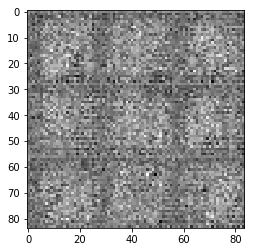

Epoch 1/2... Discriminator Loss: 0.3662... Generator Loss: 1.7680
Epoch 1/2... Discriminator Loss: 0.5232... Generator Loss: 1.4664
Epoch 1/2... Discriminator Loss: 0.3644... Generator Loss: 1.7480
Epoch 1/2... Discriminator Loss: 0.2860... Generator Loss: 1.9747
Epoch 1/2... Discriminator Loss: 0.3638... Generator Loss: 1.8457
Epoch 1/2... Discriminator Loss: 0.4226... Generator Loss: 1.7744
Epoch 1/2... Discriminator Loss: 0.2799... Generator Loss: 2.1209
Epoch 1/2... Discriminator Loss: 0.3349... Generator Loss: 1.9222
Epoch 1/2... Discriminator Loss: 0.3882... Generator Loss: 1.8771
Epoch 1/2... Discriminator Loss: 0.3007... Generator Loss: 1.9632


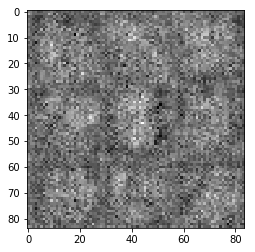

Epoch 1/2... Discriminator Loss: 0.5233... Generator Loss: 1.4733
Epoch 1/2... Discriminator Loss: 0.3109... Generator Loss: 1.7860
Epoch 1/2... Discriminator Loss: 0.2604... Generator Loss: 2.0450
Epoch 1/2... Discriminator Loss: 0.3262... Generator Loss: 1.7142
Epoch 1/2... Discriminator Loss: 0.2379... Generator Loss: 2.0566
Epoch 1/2... Discriminator Loss: 0.2316... Generator Loss: 2.1257
Epoch 1/2... Discriminator Loss: 0.2183... Generator Loss: 2.1274
Epoch 1/2... Discriminator Loss: 0.2821... Generator Loss: 1.9130
Epoch 1/2... Discriminator Loss: 0.2829... Generator Loss: 1.8529
Epoch 1/2... Discriminator Loss: 0.2583... Generator Loss: 1.9129


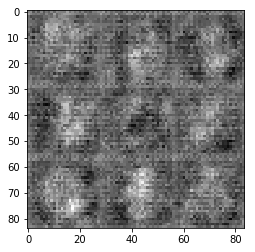

Epoch 1/2... Discriminator Loss: 0.2873... Generator Loss: 1.8999
Epoch 1/2... Discriminator Loss: 0.2856... Generator Loss: 1.9776
Epoch 1/2... Discriminator Loss: 0.3173... Generator Loss: 1.7508
Epoch 1/2... Discriminator Loss: 0.2871... Generator Loss: 1.7719
Epoch 1/2... Discriminator Loss: 0.3486... Generator Loss: 1.5640
Epoch 1/2... Discriminator Loss: 0.2936... Generator Loss: 1.7136
Epoch 1/2... Discriminator Loss: 0.3198... Generator Loss: 1.7334
Epoch 1/2... Discriminator Loss: 0.2787... Generator Loss: 1.8623
Epoch 1/2... Discriminator Loss: 0.3046... Generator Loss: 1.7078
Epoch 1/2... Discriminator Loss: 0.2696... Generator Loss: 1.8066


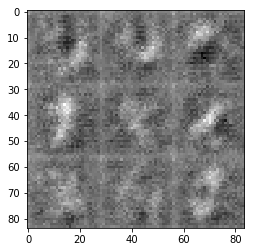

Epoch 1/2... Discriminator Loss: 0.2615... Generator Loss: 1.8645
Epoch 1/2... Discriminator Loss: 0.2628... Generator Loss: 1.8367
Epoch 1/2... Discriminator Loss: 0.3224... Generator Loss: 1.6175
Epoch 1/2... Discriminator Loss: 0.2762... Generator Loss: 1.9133
Epoch 1/2... Discriminator Loss: 0.4553... Generator Loss: 1.3792
Epoch 1/2... Discriminator Loss: 0.2393... Generator Loss: 2.0128
Epoch 1/2... Discriminator Loss: 0.2152... Generator Loss: 2.0563
Epoch 1/2... Discriminator Loss: 0.2841... Generator Loss: 1.8698
Epoch 1/2... Discriminator Loss: 0.2788... Generator Loss: 1.9488
Epoch 1/2... Discriminator Loss: 0.2547... Generator Loss: 2.0063


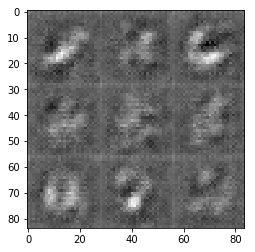

Epoch 1/2... Discriminator Loss: 0.3177... Generator Loss: 1.7712
Epoch 1/2... Discriminator Loss: 0.2885... Generator Loss: 1.8421
Epoch 1/2... Discriminator Loss: 0.2789... Generator Loss: 2.1736
Epoch 1/2... Discriminator Loss: 0.2328... Generator Loss: 2.0978
Epoch 1/2... Discriminator Loss: 0.2277... Generator Loss: 2.0178
Epoch 1/2... Discriminator Loss: 0.2543... Generator Loss: 1.9977
Epoch 1/2... Discriminator Loss: 0.2177... Generator Loss: 2.1992
Epoch 1/2... Discriminator Loss: 0.2067... Generator Loss: 2.1505
Epoch 1/2... Discriminator Loss: 0.1813... Generator Loss: 2.2804
Epoch 1/2... Discriminator Loss: 0.1819... Generator Loss: 2.3356


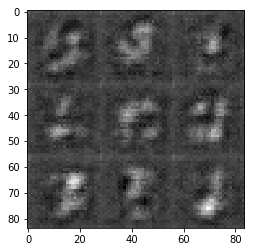

Epoch 1/2... Discriminator Loss: 0.2278... Generator Loss: 1.9892
Epoch 1/2... Discriminator Loss: 0.2120... Generator Loss: 2.0039
Epoch 1/2... Discriminator Loss: 0.2659... Generator Loss: 1.7704
Epoch 1/2... Discriminator Loss: 0.1901... Generator Loss: 2.1827
Epoch 1/2... Discriminator Loss: 0.3526... Generator Loss: 1.5273
Epoch 1/2... Discriminator Loss: 0.2171... Generator Loss: 2.1057
Epoch 1/2... Discriminator Loss: 0.2257... Generator Loss: 2.1137
Epoch 1/2... Discriminator Loss: 0.2947... Generator Loss: 1.7590
Epoch 1/2... Discriminator Loss: 0.1900... Generator Loss: 2.1238
Epoch 1/2... Discriminator Loss: 0.2004... Generator Loss: 2.1635


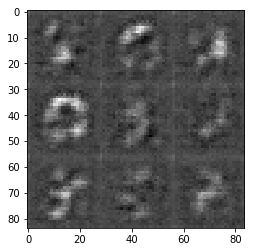

Epoch 1/2... Discriminator Loss: 0.1585... Generator Loss: 2.4069
Epoch 1/2... Discriminator Loss: 0.1879... Generator Loss: 2.2797
Epoch 1/2... Discriminator Loss: 0.2499... Generator Loss: 1.8461
Epoch 1/2... Discriminator Loss: 0.1716... Generator Loss: 2.3380
Epoch 1/2... Discriminator Loss: 0.1858... Generator Loss: 2.2113
Epoch 1/2... Discriminator Loss: 0.2220... Generator Loss: 2.0481
Epoch 1/2... Discriminator Loss: 0.1417... Generator Loss: 2.3965
Epoch 1/2... Discriminator Loss: 0.3482... Generator Loss: 1.5237
Epoch 1/2... Discriminator Loss: 0.1831... Generator Loss: 2.2980
Epoch 1/2... Discriminator Loss: 0.1967... Generator Loss: 2.2910


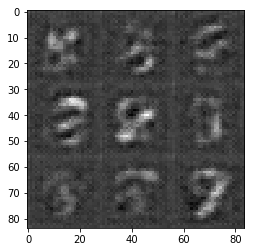

Epoch 1/2... Discriminator Loss: 0.2244... Generator Loss: 2.1841
Epoch 1/2... Discriminator Loss: 0.2477... Generator Loss: 1.9834
Epoch 1/2... Discriminator Loss: 0.1656... Generator Loss: 2.6549
Epoch 1/2... Discriminator Loss: 0.2036... Generator Loss: 2.1084
Epoch 1/2... Discriminator Loss: 0.1567... Generator Loss: 2.4911
Epoch 1/2... Discriminator Loss: 0.2693... Generator Loss: 1.7210
Epoch 1/2... Discriminator Loss: 0.2510... Generator Loss: 2.1204
Epoch 1/2... Discriminator Loss: 0.1697... Generator Loss: 2.4514
Epoch 1/2... Discriminator Loss: 0.3805... Generator Loss: 1.3915
Epoch 1/2... Discriminator Loss: 0.2185... Generator Loss: 1.9842


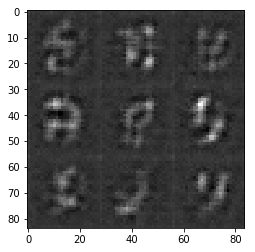

Epoch 1/2... Discriminator Loss: 0.1760... Generator Loss: 2.5235
Epoch 1/2... Discriminator Loss: 0.1522... Generator Loss: 2.5945
Epoch 1/2... Discriminator Loss: 0.2371... Generator Loss: 2.0103
Epoch 2/2... Discriminator Loss: 0.2984... Generator Loss: 1.7316
Epoch 2/2... Discriminator Loss: 0.1913... Generator Loss: 2.2642
Epoch 2/2... Discriminator Loss: 0.1782... Generator Loss: 2.3987
Epoch 2/2... Discriminator Loss: 0.1942... Generator Loss: 2.1721
Epoch 2/2... Discriminator Loss: 0.2014... Generator Loss: 2.2784
Epoch 2/2... Discriminator Loss: 0.2224... Generator Loss: 2.2534
Epoch 2/2... Discriminator Loss: 0.2529... Generator Loss: 2.0159


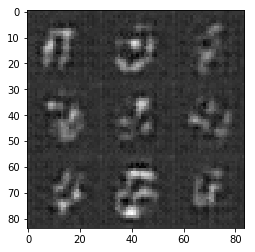

Epoch 2/2... Discriminator Loss: 0.2137... Generator Loss: 2.2099
Epoch 2/2... Discriminator Loss: 0.2045... Generator Loss: 2.1634
Epoch 2/2... Discriminator Loss: 0.1579... Generator Loss: 2.4981
Epoch 2/2... Discriminator Loss: 0.2222... Generator Loss: 2.0407
Epoch 2/2... Discriminator Loss: 0.1471... Generator Loss: 2.4707
Epoch 2/2... Discriminator Loss: 0.1779... Generator Loss: 2.4067
Epoch 2/2... Discriminator Loss: 0.2485... Generator Loss: 2.0796
Epoch 2/2... Discriminator Loss: 0.1584... Generator Loss: 2.3472
Epoch 2/2... Discriminator Loss: 0.1597... Generator Loss: 2.4800
Epoch 2/2... Discriminator Loss: 0.1773... Generator Loss: 2.3739


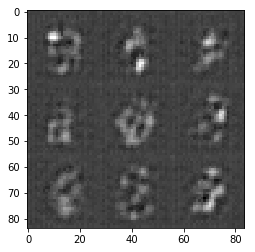

Epoch 2/2... Discriminator Loss: 0.1988... Generator Loss: 2.2344
Epoch 2/2... Discriminator Loss: 0.1483... Generator Loss: 2.5062
Epoch 2/2... Discriminator Loss: 0.1220... Generator Loss: 2.7916
Epoch 2/2... Discriminator Loss: 0.1146... Generator Loss: 2.7518
Epoch 2/2... Discriminator Loss: 0.1130... Generator Loss: 2.9532
Epoch 2/2... Discriminator Loss: 0.1599... Generator Loss: 2.5004
Epoch 2/2... Discriminator Loss: 0.1712... Generator Loss: 2.4193
Epoch 2/2... Discriminator Loss: 0.1491... Generator Loss: 2.5213
Epoch 2/2... Discriminator Loss: 0.1861... Generator Loss: 2.4933
Epoch 2/2... Discriminator Loss: 0.1649... Generator Loss: 2.3890


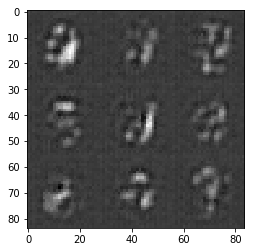

Epoch 2/2... Discriminator Loss: 0.1389... Generator Loss: 2.6770
Epoch 2/2... Discriminator Loss: 0.1600... Generator Loss: 2.4265
Epoch 2/2... Discriminator Loss: 0.1640... Generator Loss: 2.4372
Epoch 2/2... Discriminator Loss: 0.1397... Generator Loss: 2.4799
Epoch 2/2... Discriminator Loss: 0.1518... Generator Loss: 2.4192
Epoch 2/2... Discriminator Loss: 0.1702... Generator Loss: 2.2945
Epoch 2/2... Discriminator Loss: 0.2249... Generator Loss: 2.1674
Epoch 2/2... Discriminator Loss: 0.1464... Generator Loss: 2.5393
Epoch 2/2... Discriminator Loss: 0.1457... Generator Loss: 2.4761
Epoch 2/2... Discriminator Loss: 0.1300... Generator Loss: 2.5790


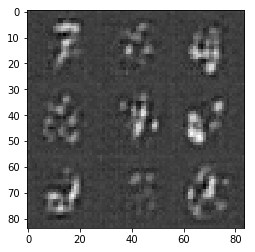

Epoch 2/2... Discriminator Loss: 0.1501... Generator Loss: 2.5758
Epoch 2/2... Discriminator Loss: 0.1933... Generator Loss: 2.2746
Epoch 2/2... Discriminator Loss: 0.0852... Generator Loss: 3.1359
Epoch 2/2... Discriminator Loss: 0.1309... Generator Loss: 2.5943
Epoch 2/2... Discriminator Loss: 0.1313... Generator Loss: 2.4867
Epoch 2/2... Discriminator Loss: 0.1124... Generator Loss: 2.7067
Epoch 2/2... Discriminator Loss: 0.1411... Generator Loss: 2.4881
Epoch 2/2... Discriminator Loss: 0.1207... Generator Loss: 2.7692
Epoch 2/2... Discriminator Loss: 0.1556... Generator Loss: 2.5135
Epoch 2/2... Discriminator Loss: 0.1352... Generator Loss: 2.7533


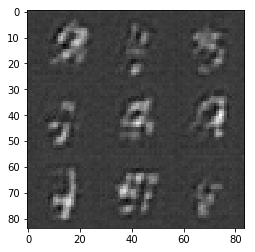

Epoch 2/2... Discriminator Loss: 0.1320... Generator Loss: 2.8273
Epoch 2/2... Discriminator Loss: 0.1781... Generator Loss: 2.2820
Epoch 2/2... Discriminator Loss: 0.1344... Generator Loss: 2.7546
Epoch 2/2... Discriminator Loss: 0.0838... Generator Loss: 3.2197
Epoch 2/2... Discriminator Loss: 0.0974... Generator Loss: 3.1702
Epoch 2/2... Discriminator Loss: 0.1287... Generator Loss: 2.7994
Epoch 2/2... Discriminator Loss: 0.1351... Generator Loss: 2.6896
Epoch 2/2... Discriminator Loss: 0.1119... Generator Loss: 2.8283
Epoch 2/2... Discriminator Loss: 0.1829... Generator Loss: 2.4384
Epoch 2/2... Discriminator Loss: 0.1140... Generator Loss: 2.7911


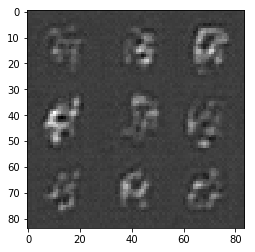

Epoch 2/2... Discriminator Loss: 0.2893... Generator Loss: 1.7606
Epoch 2/2... Discriminator Loss: 0.1744... Generator Loss: 2.2584
Epoch 2/2... Discriminator Loss: 0.1476... Generator Loss: 2.4771
Epoch 2/2... Discriminator Loss: 0.1084... Generator Loss: 2.8399


In [ ]:
batch_size = 64
z_dim = 3136
learning_rate = 0.001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

In [ ]:
batch_size = None
z_dim = None
learning_rate = None
beta1 = None


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.